# PART- 3 `( Handling With Outliers )`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
# pd.set_option('display.max_rows', None)

In [3]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''' "!?|.,*+-_/][''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [4]:
df = pd.read_csv("auto_scout_filled.csv")
df.head().T

,0,1,2,3,4
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price_€,15770.0,14500.0,14640.0,14500.0,16790.0
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0
hp_kW,66.0,141.0,85.0,66.0,66.0
type,Used,Used,Used,Used,Used
previous_owners,2.0,1.0,1.0,1.0,1.0
warranty,0.0,0.0,0.0,0.0,0.0
make,Audi,Audi,Audi,Audi,Audi
model,A1,A1,A1,A1,A1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_type               15919 non-null  object 
 1   price_€                 15919 non-null  float64
 2   vat                     15919 non-null  object 
 3   km                      15919 non-null  float64
 4   hp_kW                   15919 non-null  float64
 5   type                    15919 non-null  object 
 6   previous_owners         15919 non-null  float64
 7   warranty                15919 non-null  float64
 8   make                    15919 non-null  object 
 9   model                   15919 non-null  object 
 10  body_color              15919 non-null  object 
 11  paint_type              15919 non-null  object 
 12  upholstery              15919 non-null  object 
 13  nr_of_doors             15919 non-null  float64
 14  nr_of_seats             15919 non-null

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_€,15919.0,18019.896727,7386.169409,13.000000,12850.0,16900.0,21900.000000,74600.0
km,15919.0,31964.846747,37069.923557,0.000000,2000.0,20410.0,46898.500000,317000.0
hp_kW,15919.0,88.372385,26.840256,1.000000,66.0,85.0,101.000000,294.0
previous_owners,15919.0,0.947170,0.394599,0.000000,1.0,1.0,1.000000,4.0
warranty,15919.0,0.304856,0.460361,0.000000,0.0,0.0,1.000000,1.0
nr_of_doors,15919.0,4.660657,0.642198,1.000000,4.0,5.0,5.000000,7.0
nr_of_seats,15919.0,4.952258,0.476599,2.000000,5.0,5.0,5.000000,7.0
engine_displacement_cc,15919.0,1424.823984,331.310153,1.000000,1229.0,1461.0,1598.000000,16000.0
cylinders,15919.0,3.794208,0.420440,1.000000,4.0,4.0,4.000000,8.0
weight_kg,15919.0,1345.403135,203.202339,1.000000,1180.0,1308.0,1472.000000,2471.0


In [7]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    print("mean : ", round(df[col].mean(), 2))
    print("median : ", round(df[col].median(), 2))
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_low = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_low)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")
    print("the smallest 10 values :\n", df[col].sort_values().head(10))
    print(" ")
    print("the biggest 10 values :\n", df[col].sort_values(ascending = False).head(10))
    
    print("\n\n")

In [8]:
for i in df.select_dtypes(exclude="O").columns:
    detect_outlier(i)

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean :  18019.9
median :  16900.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594       13.0
8828      120.0
6066      255.0
8829      331.0
8827     4950.0
8825     4990.0
8826     5250.0
8824     5300.0
13770    5445.0
8823     5450.0
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648     74600.0
15826    68320.0
3649     67600.0
3587     64900.0
15828    64332.0
15831    64298.0
3595     63900.0
15833    63477.0
3590     62900.0
3594     58990.0
Name: price_€, dtype: float64



column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean :  31964.85
median :  20410.0
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518    0.0
9892     0.0
2496     0.0
98

In [9]:
df_numeric = df.select_dtypes(include="number")

In [10]:
df_numeric.columns


Index(['price_€', 'km', 'hp_kW', 'previous_owners', 'warranty', 'nr_of_doors',
       'nr_of_seats', 'engine_displacement_cc', 'cylinders', 'weight_kg',
       'co2e_g', 'gears', 'consumption_comb', 'consumption_city',
       'consumption_country', 'age'],
      dtype='object')

In [11]:
def detect_values(col, col2):
    my_list = df[col].unique()
    for i in my_list:
        a = df[df[col] == i][col2].max()
        b = df[df[col] == i][col2].min()
        c = df[df[col] == i][col2].mean()
        print(f"{i} max : {a}   min : {b}   mean : {c}")

## 1. price_€

In [12]:
detect_outlier("price_€")

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean :  18019.9
median :  16900.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594       13.0
8828      120.0
6066      255.0
8829      331.0
8827     4950.0
8825     4990.0
8826     5250.0
8824     5300.0
13770    5445.0
8823     5450.0
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648     74600.0
15826    68320.0
3649     67600.0
3587     64900.0
15828    64332.0
15831    64298.0
3595     63900.0
15833    63477.0
3590     62900.0
3594     58990.0
Name: price_€, dtype: float64





<AxesSubplot:xlabel='price_€'>

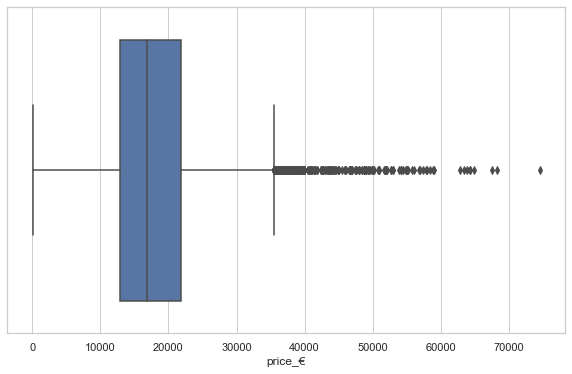

In [13]:
sns.boxplot(df["price_€"])

In [14]:
df.iloc[[8594, 8828, 6066, 8829]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
8594,Sedans,13.0,VAT deductible,123.0,66.0,Used,1.0,0.0,Opel,Corsa,Gold,Metallic,Cloth,3.0,5.0,Manual,1398.0,4.0,1141.0,front,Benzine,128.0,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.0,Unknown,5.60,6.8,4.9,1.0
8828,Compact,120.0,VAT deductible,12.0,66.0,New,0.0,0.0,Opel,Corsa,Grey,Metallic,Cloth,5.0,5.0,Manual,999.0,3.0,1099.0,front,Benzine,107.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.0,Netherlands,4.60,5.6,4.1,0.0
6066,Station wagon,255.0,VAT deductible,5563.0,100.0,Used,1.0,0.0,Opel,Astra,Gold,Metallic,Cloth,5.0,5.0,Manual,1598.0,4.0,1403.0,front,Diesel,101.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.0,Unknown,3.80,4.5,3.4,1.0
8829,Other,331.0,VAT deductible,10.0,66.0,New,0.0,0.0,Opel,Corsa,White,Metallic,Cloth,5.0,5.0,Manual,999.0,3.0,1163.0,front,Benzine,128.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.0,Netherlands,6.65,8.2,5.7,0.0


In [15]:
df.loc[df["price_€"] < 332.0,  ["price_€"]] = np.nan

In [16]:
df["price_€"].isnull().sum()

4

In [17]:
df["price_€"] = df.groupby(["make", "model", "body_type", "age"])["price_€"].apply(lambda x : x.fillna(round(x.mean(), 0)))

In [18]:
df.iloc[[8594, 8828, 6066, 8829]]["price_€"]

8594    10853.0
8828    13816.0
6066    16933.0
8829    12310.0
Name: price_€, dtype: float64

<AxesSubplot:xlabel='price_€'>

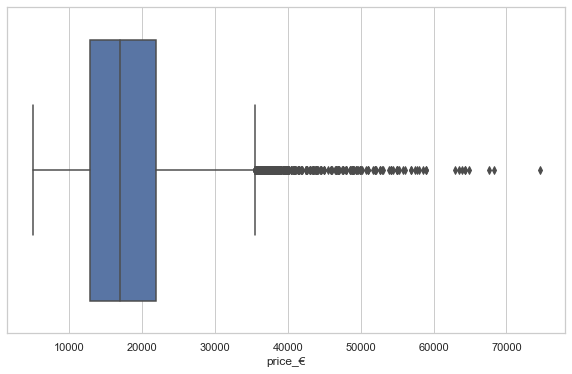

In [19]:
sns.boxplot(df["price_€"])

## 2. km

In [20]:
detect_outlier("km")

column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean :  31964.85
median :  20410.0
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518    0.0
9892     0.0
2496     0.0
9882     0.0
15668    0.0
5553     0.0
12512    0.0
5672     0.0
9929     0.0
7828     0.0
Name: km, dtype: float64
 
the biggest 10 values :
 9279     317000.0
3003     291800.0
5712     260000.0
6224     248000.0
15277    240000.0
10804    232000.0
6380     231879.0
6062     230928.0
6399     229500.0
10495    222346.0
Name: km, dtype: float64





<AxesSubplot:xlabel='km'>

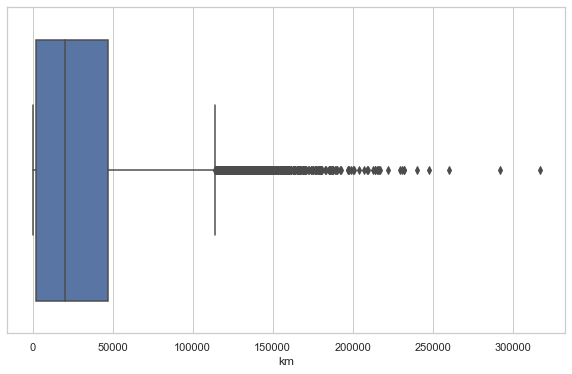

In [21]:
sns.boxplot(df.km)

In [22]:
df.groupby("age")["km"].mean()
df.groupby("age")["km"].min()
df.groupby("age")["km"].max()

age
0.0    127022.0
1.0    136000.0
2.0    317000.0
3.0    291800.0
Name: km, dtype: float64

## 3. hp_kW

In [23]:
detect_outlier("hp_kW")

column name :  hp_kW
----------------------------------------
Q1 :  66.0
Q3 :  101.0
IQR :  35.0
lower limit :  13.5
mean :  88.37
median :  85.0
upper limit :  153.5
count of lower values :  22
count of upper values :  406
 
the smallest 10 values :
 6034    1.0
7019    1.0
7014    1.0
9285    1.0
6005    1.0
9287    1.0
9288    1.0
7018    1.0
9289    1.0
9290    1.0
Name: hp_kW, dtype: float64
 
the biggest 10 values :
 3595    294.0
3606    294.0
3587    294.0
3590    294.0
3592    294.0
3593    294.0
3596    294.0
3598    294.0
3599    294.0
3600    294.0
Name: hp_kW, dtype: float64





<AxesSubplot:xlabel='hp_kW'>

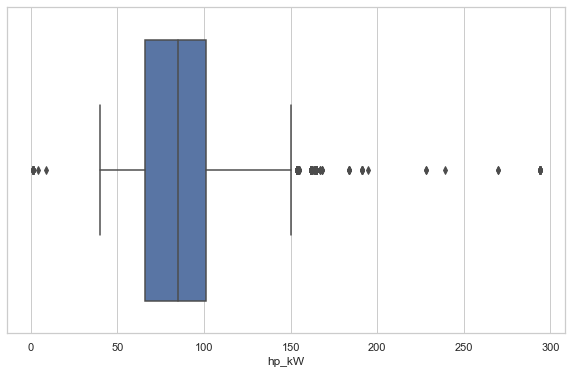

In [24]:
sns.boxplot(df.hp_kW)

In [25]:
# the hp_kw values for opel corsa is min=33 max=155

In [26]:
df.hp_kW = df.groupby(["make", "model","drive_chain","engine_displacement_cc"])["hp_kW"].apply(lambda x : x.fillna(x.median() if x.median() > 1 else df.hp_kW.median()))

In [27]:
df.hp_kW.isnull().sum()

0

<AxesSubplot:xlabel='hp_kW'>

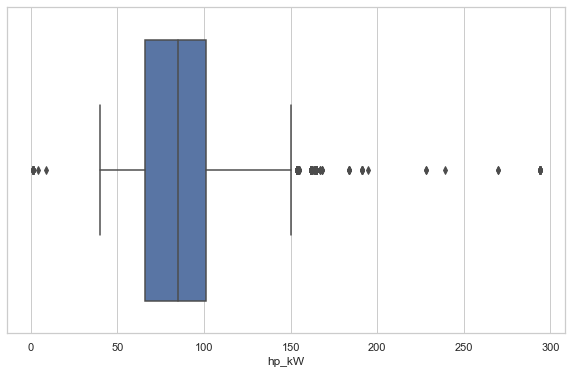

In [28]:
sns.boxplot(df.hp_kW)

## 4. nr_of_doors

In [29]:
detect_outlier("nr_of_doors")

column name :  nr_of_doors
----------------------------------------
Q1 :  4.0
Q3 :  5.0
IQR :  1.0
lower limit :  2.5
mean :  4.66
median :  5.0
upper limit :  6.5
count of lower values :  220
count of upper values :  1
 
the smallest 10 values :
 13782    1.0
1811     2.0
1228     2.0
1229     2.0
1230     2.0
1231     2.0
303      2.0
1233     2.0
1234     2.0
1235     2.0
Name: nr_of_doors, dtype: float64
 
the biggest 10 values :
 15202    7.0
0        5.0
10023    5.0
10012    5.0
10013    5.0
10014    5.0
10015    5.0
10016    5.0
10017    5.0
10018    5.0
Name: nr_of_doors, dtype: float64





<AxesSubplot:xlabel='nr_of_doors'>

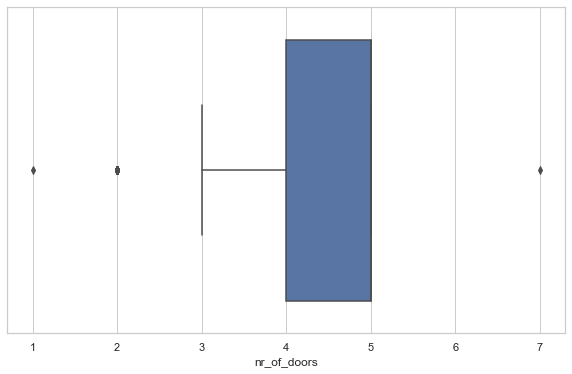

In [30]:
sns.boxplot(df.nr_of_doors)

In [31]:
df.loc[(df.nr_of_doors == 1) | (df.nr_of_doors == 7), "nr_of_doors"] = 5

In [32]:
detect_outlier("nr_of_doors")

column name :  nr_of_doors
----------------------------------------
Q1 :  4.0
Q3 :  5.0
IQR :  1.0
lower limit :  2.5
mean :  4.66
median :  5.0
upper limit :  6.5
count of lower values :  219
count of upper values :  0
 
the smallest 10 values :
 1811    2.0
3724    2.0
1228    2.0
1229    2.0
303     2.0
1230    2.0
1231    2.0
1233    2.0
1234    2.0
1235    2.0
Name: nr_of_doors, dtype: float64
 
the biggest 10 values :
 0        5.0
10008    5.0
10010    5.0
10012    5.0
10013    5.0
10014    5.0
10015    5.0
10016    5.0
10017    5.0
10018    5.0
Name: nr_of_doors, dtype: float64





<AxesSubplot:xlabel='nr_of_doors'>

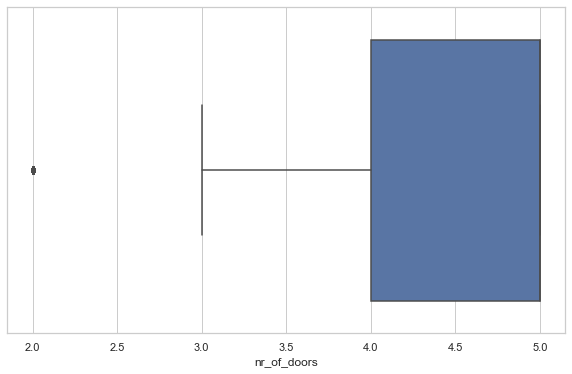

In [33]:
sns.boxplot(df.nr_of_doors)

## 5. nr_of_seats

In [34]:
detect_outlier("nr_of_seats")

column name :  nr_of_seats
----------------------------------------
Q1 :  5.0
Q3 :  5.0
IQR :  0.0
lower limit :  5.0
mean :  4.95
median :  5.0
upper limit :  5.0
count of lower values :  1247
count of upper values :  364
 
the smallest 10 values :
 13608    2.0
13383    2.0
14152    2.0
13571    2.0
13919    2.0
13629    2.0
13918    2.0
13628    2.0
13627    2.0
13625    2.0
Name: nr_of_seats, dtype: float64
 
the biggest 10 values :
 15125    7.0
15274    7.0
15010    7.0
15011    7.0
15012    7.0
15656    7.0
15657    7.0
15013    7.0
15014    7.0
15660    7.0
Name: nr_of_seats, dtype: float64





In [35]:
df[df["nr_of_seats"] == 7][["make", "model", "body_type"]].value_counts()

make     model   body_type    
Renault  Espace  Van              315
                 Station wagon     19
                 Transporter       16
                 Sedans             4
                 Off-Road           3
                 Other              3
                 Compact            2
dtype: int64

In [36]:
df[df["nr_of_seats"] == 2][["make", "model", "body_type"]].value_counts()

make     model     body_type    
Renault  Clio      Sedans           71
                   Transporter      29
                   Compact           8
Opel     Corsa     Transporter       4
Renault  Clio      Other             4
Opel     Corsa     Coupe             1
         Insignia  Station wagon     1
Renault  Clio      Van               1
dtype: int64

## 6. engine_displacement_cc

In [37]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1229.0
Q3 :  1598.0
IQR :  369.0
lower limit :  675.5
mean :  1424.82
median :  1461.0
upper limit :  2151.5
count of lower values :  51
count of upper values :  23
 
the smallest 10 values :
 14315    1.0
12473    1.0
12484    1.0
14328    1.0
14327    1.0
14326    1.0
13904    1.0
14325    1.0
14324    1.0
14322    1.0
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10932    16000.0
7169     15898.0
10771     2967.0
3609      2480.0
3604      2480.0
3602      2480.0
3601      2480.0
3600      2480.0
3599      2480.0
3598      2480.0
Name: engine_displacement_cc, dtype: float64





<AxesSubplot:xlabel='engine_displacement_cc'>

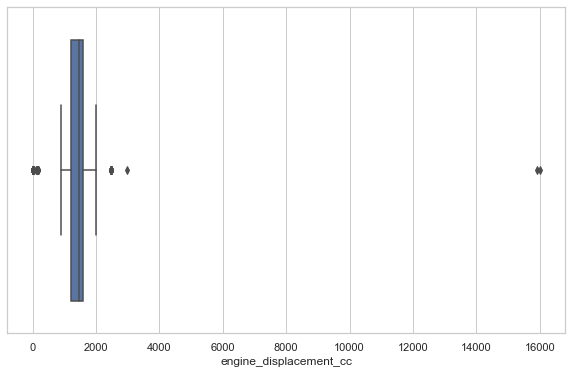

In [38]:
sns.boxplot(df.engine_displacement_cc)

In [39]:
df.engine_displacement_cc.isnull().sum()

0

In [40]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1229.0
Q3 :  1598.0
IQR :  369.0
lower limit :  675.5
mean :  1424.82
median :  1461.0
upper limit :  2151.5
count of lower values :  51
count of upper values :  23
 
the smallest 10 values :
 14315    1.0
12473    1.0
12484    1.0
14328    1.0
14327    1.0
14326    1.0
13904    1.0
14325    1.0
14324    1.0
14322    1.0
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10932    16000.0
7169     15898.0
10771     2967.0
3609      2480.0
3604      2480.0
3602      2480.0
3601      2480.0
3600      2480.0
3599      2480.0
3598      2480.0
Name: engine_displacement_cc, dtype: float64





In [41]:
# df.loc[(df.engine_displacement_cc > 3000), "engine_displacement_cc"] = df.engine_displacement_cc/10

In [42]:
df.iloc[[10932, 7169]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
10932,Station wagon,14300.0,Price negotiable,76500.0,88.0,Used,1.0,0.0,Opel,Insignia,Grey,Metallic,Full leather,5.0,5.0,Manual,16000.0,4.0,1623.0,front,Diesel,135.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,Unknown,4.5,5.7,3.764516,3.0
7169,Station wagon,18490.0,VAT deductible,22327.0,100.0,Employee's car,1.0,0.0,Opel,Astra,Green,Metallic,Cloth,5.0,5.0,Automatic,15898.0,4.0,1393.0,front,Benzine,119.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,Unknown,4.5,5.7,3.800000,1.0


In [43]:
df.loc[(df.engine_displacement_cc < 800), "engine_displacement_cc"] = np.nan

In [44]:
df.groupby(["make", "model","cylinders", "hp_kW"])["engine_displacement_cc"].apply(lambda x : x.fillna(x.median()) if x.median() > 0 else df["engine_displacement_cc"].median()).isnull().sum()

0

In [45]:
df.engine_displacement_cc = df.groupby(["make", "model","cylinders", "hp_kW"])["engine_displacement_cc"].apply(lambda x : x.fillna(x.median()) if x.median() > 0 else df["engine_displacement_cc"].median())

In [46]:
get_diff_category_column(df.engine_displacement_cc)

{0: '1000.0',
 1: '1100.0',
 2: '1149.0',
 3: '1195.0',
 4: '1197.0',
 5: '1198.0',
 6: '1199.0',
 7: '1200.0',
 8: '1229.0',
 9: '1239.0',
 10: '1248.0',
 11: '1300.0',
 12: '1333.0',
 13: '1350.0',
 14: '1364.0',
 15: '1368.0',
 16: '1369.0',
 17: '1390.0',
 18: '1395.0',
 19: '1396.0',
 20: '1397.0',
 21: '1398.0',
 22: '1399.0',
 23: '1400.0',
 24: '1422.0',
 25: '1461.0',
 26: '1490.0',
 27: '1495.0',
 28: '1496.0',
 29: '1498.0',
 30: '1499.0',
 31: '1500.0',
 32: '1533.0',
 33: '1568.0',
 34: '1580.0',
 35: '1584.0',
 36: '1589.0',
 37: '15898.0',
 38: '1596.0',
 39: '1598.0',
 40: '1599.0',
 41: '1600.0',
 42: '16000.0',
 43: '1618.0',
 44: '1686.0',
 45: '1696.0',
 46: '1798.0',
 47: '1800.0',
 48: '1856.0',
 49: '1896.0',
 50: '1956.0',
 51: '1968.0',
 52: '1984.0',
 53: '1995.0',
 54: '1997.0',
 55: '1998.0',
 56: '2000.0',
 57: '2480.0',
 58: '2967.0',
 59: '890.0',
 60: '898.0',
 61: '899.0',
 62: '900.0',
 63: '929.0',
 64: '973.0',
 65: '995.0',
 66: '996.0',
 67: '997.0

In [47]:
df.loc[df.engine_displacement_cc > 2500, "engine_displacement_cc" ] = 3.0
df.loc[df.engine_displacement_cc > 2000, "engine_displacement_cc" ] = 2.5
df.loc[df.engine_displacement_cc > 1800, "engine_displacement_cc" ] = 2.0
df.loc[df.engine_displacement_cc > 1600, "engine_displacement_cc" ] = 1.8
df.loc[df.engine_displacement_cc > 1500, "engine_displacement_cc" ] = 1.6
df.loc[df.engine_displacement_cc > 1400, "engine_displacement_cc" ] = 1.5
df.loc[df.engine_displacement_cc > 1300, "engine_displacement_cc" ] = 1.4
df.loc[df.engine_displacement_cc > 1200, "engine_displacement_cc" ] = 1.3
df.loc[df.engine_displacement_cc > 1100, "engine_displacement_cc" ] = 1.2
df.loc[df.engine_displacement_cc > 800, "engine_displacement_cc" ] = 1.0

In [48]:
df.engine_displacement_cc = df.engine_displacement_cc *1000

In [49]:
df.engine_displacement_cc.value_counts()

1600.0    5160
1000.0    2992
1400.0    2656
1500.0    1950
2000.0    1195
1300.0     829
1200.0     682
1800.0     432
2500.0      20
3000.0       3
Name: engine_displacement_cc, dtype: int64

In [50]:
df.engine_displacement_cc.isnull().sum()

0

<AxesSubplot:xlabel='engine_displacement_cc'>

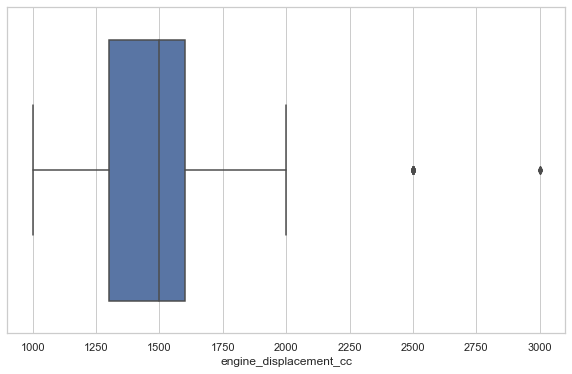

In [51]:
sns.boxplot(df.engine_displacement_cc)

## 7. cylinders

In [52]:
detect_outlier("cylinders")

column name :  cylinders
----------------------------------------
Q1 :  4.0
Q3 :  4.0
IQR :  0.0
lower limit :  4.0
mean :  3.79
median :  4.0
upper limit :  4.0
count of lower values :  3328
count of upper values :  32
 
the smallest 10 values :
 9956     1.0
15835    2.0
11342    2.0
0        3.0
2544     3.0
2545     3.0
2546     3.0
2547     3.0
2548     3.0
2549     3.0
Name: cylinders, dtype: float64
 
the biggest 10 values :
 15151    8.0
15197    8.0
15186    8.0
14989    8.0
535      8.0
15165    8.0
15055    8.0
10771    6.0
10826    6.0
12897    6.0
Name: cylinders, dtype: float64





In [53]:
df[(df.cylinders == 1) | (df.cylinders==2)]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
9956,Compact,16625.0,VAT deductible,100.0,66.0,Pre-registered,1.0,0.0,Opel,Corsa,Black,Metallic,Cloth,3.0,5.0,Automatic,1400.0,1.0,1163.0,front,Benzine,140.0,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport suspension","ABS,Central door lock,Daytime running lights,D...",6.0,Germany,6.002,7.8,4.9,0.0
11342,Station wagon,21900.0,VAT deductible,13600.0,100.0,Employee's car,1.0,0.0,Opel,Insignia,Grey,Metallic,Part leather,5.0,5.0,Automatic,1600.0,2.0,1623.0,front,Diesel,135.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Central door lock with remote control,Driv...",6.0,Italy,5.012,6.5,4.1,1.0
15835,Van,47590.0,VAT deductible,6000.0,147.0,Employee's car,1.0,0.0,Renault,Espace,Black,Metallic,Full leather,5.0,7.0,Automatic,2000.0,2.0,1840.0,front,Diesel,139.0,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Voice Control,"ABS,Alarm system,Blind spot monitor,Central do...",6.0,Germany,5.300,6.2,4.7,0.0


In [54]:
df.loc[(df.cylinders ==1)|(df.cylinders ==2), "cylinders"] = 4.0

## 8. weight_kg

In [55]:
detect_outlier("weight_kg")

column name :  weight_kg
----------------------------------------
Q1 :  1180.0
Q3 :  1472.0
IQR :  292.0
lower limit :  742.0
mean :  1345.4
median :  1308.0
upper limit :  1910.0
count of lower values :  3
count of upper values :  89
 
the smallest 10 values :
 12779      1.0
8355       1.0
1143     102.0
8857     840.0
14313    900.0
13555    977.0
13513    977.0
13937    980.0
14105    980.0
13996    980.0
Name: weight_kg, dtype: float64
 
the biggest 10 values :
 15678    2471.0
15185    2471.0
15231    2471.0
14975    2471.0
15280    2471.0
10646    2450.0
10638    2450.0
15133    2410.0
15136    2410.0
15143    2410.0
Name: weight_kg, dtype: float64





<AxesSubplot:xlabel='weight_kg'>

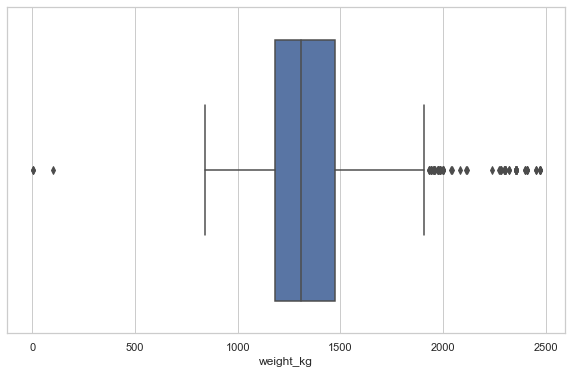

In [56]:
sns.boxplot(df.weight_kg)

In [57]:
df.groupby(["make", "model", "body_type"])["weight_kg"].value_counts().head(60)

make  model  body_type  weight_kg
Audi  A1     Compact    1180.0       612
                        1165.0        77
                        1200.0        65
                        1135.0        53
                        1195.0        40
                        1065.0        36
                        1110.0        22
                        1250.0        17
                        1105.0        12
                        1090.0         9
                        1215.0         9
                        1240.0         7
                        1035.0         6
                        1134.0         6
                        1155.0         5
                        1205.0         5
                        1275.0         5
                        1485.0         5
                        1225.0         4
                        1600.0         4
                        1115.0         3
                        1133.0         3
                        1230.0         3
                       

In [58]:
df.loc[df.weight_kg < 103, "weight_kg"] = np.nan

In [59]:
df.weight_kg = df.groupby(["make", "model", "body_type"])["weight_kg"].apply(lambda x:x.fillna(x.mean()))

<AxesSubplot:xlabel='weight_kg'>

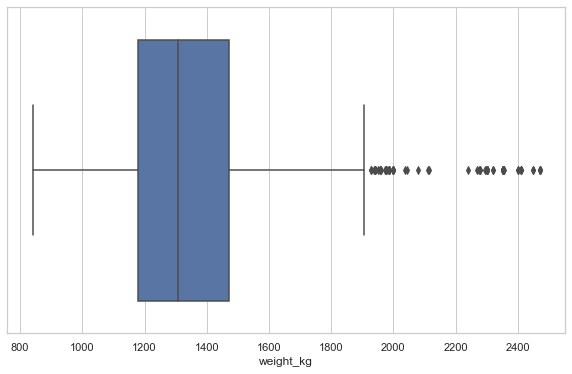

In [60]:
sns.boxplot(df.weight_kg)

## 9. co2e_g

In [61]:
detect_outlier("co2e_g")

column name :  co2e_g
----------------------------------------
Q1 :  104.0
Q3 :  128.0
IQR :  24.0
lower limit :  68.0
mean :  122.68
median :  117.0
upper limit :  164.0
count of lower values :  7
count of upper values :  247
 
the smallest 10 values :
 8110     14.0
3617     36.0
3615     36.0
3612     36.0
3356     36.0
12547    45.0
9798     51.0
7857     80.0
13668    82.0
8912     82.0
Name: co2e_g, dtype: float64
 
the biggest 10 values :
 11888    14457.0
12343    13983.0
8542     12324.0
6578     12087.0
6579     12087.0
5818     12087.0
4089      1060.0
4556       990.0
535        331.0
10513      253.0
Name: co2e_g, dtype: float64





<AxesSubplot:xlabel='co2e_g'>

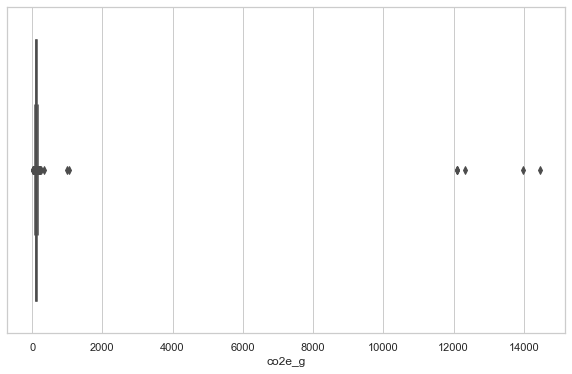

In [62]:
sns.boxplot(df.co2e_g)

In [63]:
df.co2e_g.value_counts().head(60)

120.0    1081
105.0     656
99.0      617
135.0     594
97.0      537
128.0     535
104.0     501
102.0     477
85.0      459
103.0     445
114.0     382
117.0     380
101.0     373
124.0     372
125.0     366
108.0     362
107.0     362
119.0     361
106.0     349
139.0     334
126.0     282
118.0     270
110.0     266
127.0     257
111.0     237
113.0     237
109.0     234
140.0     218
129.0     213
92.0      198
130.0     180
123.0     178
150.0     174
112.0     171
143.0     171
95.0      161
116.0     159
98.0      156
141.0     156
153.0     150
133.0     145
136.0     145
137.0     133
134.0     130
145.0     126
149.0     117
147.0     109
132.0     100
115.0      86
122.0      83
121.0      82
138.0      75
93.0       66
168.0      58
142.0      58
131.0      48
148.0      48
94.0       43
144.0      40
154.0      40
Name: co2e_g, dtype: int64

In [64]:
from scipy.stats.mstats import winsorize

In [65]:
Q1 = df.co2e_g.quantile(0.25)
Q3 = df.co2e_g.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [66]:
a = len(df.co2e_g[df.co2e_g < lower_limit]) / len(df)
a

0.00043972611344933726

In [67]:
b = len(df.co2e_g[df.co2e_g > upper_limit]) / len(df)
b

0.0155160500031409

In [68]:
table_win = winsorize(df.co2e_g, (a,b))
table_win

masked_array(data=[ 99., 129.,  99., ..., 139., 139., 153.],
             mask=False,
       fill_value=1e+20)

In [69]:
df["co2e_g"] = pd.Series(table_win)

In [70]:
df["co2e_g"].sort_values()

3617      80.0
9798      80.0
12547     80.0
7857      80.0
8110      80.0
         ...  
12568    164.0
15704    164.0
10571    164.0
10562    164.0
12662    164.0
Name: co2e_g, Length: 15919, dtype: float64

<AxesSubplot:xlabel='co2e_g'>

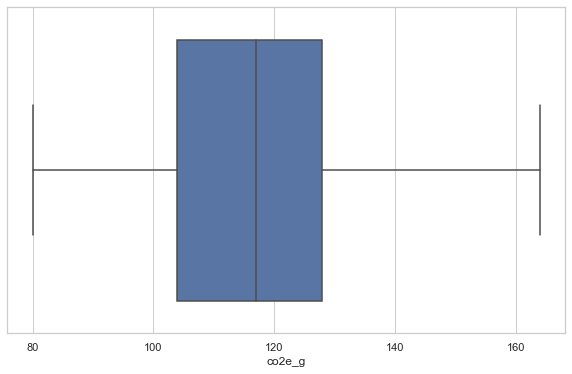

In [71]:
sns.boxplot(df.co2e_g)

## 10. gears

In [72]:
detect_outlier("gears")

column name :  gears
----------------------------------------
Q1 :  5.0
Q3 :  6.0
IQR :  1.0
lower limit :  3.5
mean :  5.94
median :  6.0
upper limit :  7.5
count of lower values :  6
count of upper values :  300
 
the smallest 10 values :
 14375    1.0
8921     1.0
9812     2.0
15817    3.0
15845    3.0
15846    3.0
15823    4.0
15822    4.0
10287    5.0
10288    5.0
Name: gears, dtype: float64
 
the biggest 10 values :
 14495    50.0
15830     9.0
15827     9.0
15876     9.0
15814     9.0
15813     9.0
15812     9.0
15869     9.0
15824     9.0
15829     9.0
Name: gears, dtype: float64





<AxesSubplot:xlabel='gears'>

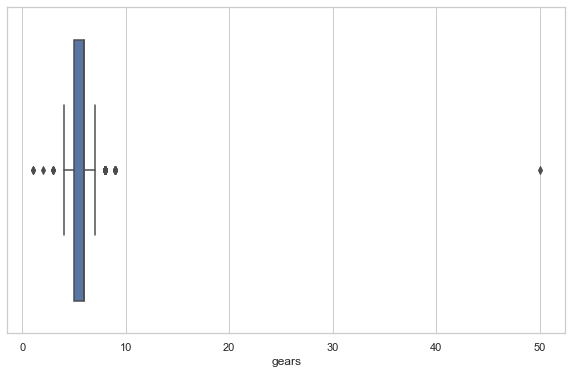

In [73]:
sns.boxplot(df.gears)

In [74]:
df[df.gears < 4][["make", "model"]]

,make,model
8921,Opel,Corsa
9812,Opel,Corsa
14375,Renault,Clio
15817,Renault,Espace
15845,Renault,Espace
15846,Renault,Espace


In [75]:
df[df.make == "Corsa"].gears.value_counts()

Series([], Name: gears, dtype: int64)

In [76]:
df[df.make == "Renault"].gears.value_counts()

6.0     1436
5.0     1177
7.0      233
9.0       11
3.0        3
4.0        2
1.0        1
50.0       1
Name: gears, dtype: int64

In [77]:
df[df.make == "Opel"].gears.value_counts()

6.0    5032
5.0    2022
8.0     282
7.0       5
1.0       1
2.0       1
Name: gears, dtype: int64

In [78]:
df[df.make == "Audi"].gears.value_counts()

7.0    2605
6.0    1902
5.0    1199
8.0       6
Name: gears, dtype: int64

In [79]:
df.loc[df.gears == 50, "gears"] = 5

In [80]:
df.loc[df.gears <= 4, "gears"] = np.nan

In [81]:
df.groupby(["make", "model", "body_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0])).isnull().sum()

0

In [82]:
df.gears = df.groupby(["make", "model", "body_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0]))

<AxesSubplot:xlabel='gears'>

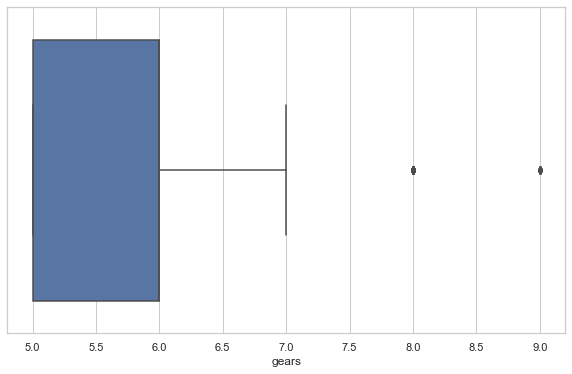

In [83]:
sns.boxplot(df.gears)

## 11. consumption_comb

In [84]:
df.drop(columns=["consumption_city", "consumption_country"], inplace=True)

In [85]:
detect_outlier("consumption_comb")

column name :  consumption_comb
----------------------------------------
Q1 :  4.1
Q3 :  5.4
IQR :  1.3000000000000007
lower limit :  2.1499999999999986
mean :  4.83
median :  4.8
upper limit :  7.350000000000001
count of lower values :  4
count of upper values :  130
 
the smallest 10 values :
 13678    1.2
3615     1.6
3617     1.6
3612     1.6
8872     3.1
8904     3.1
8874     3.1
8566     3.1
8912     3.1
13680    3.1
Name: consumption_comb, dtype: float64
 
the biggest 10 values :
 535      13.800
10513     9.714
10771     9.100
12529     8.700
10817     8.700
10819     8.700
12054     8.700
12530     8.600
10789     8.600
12422     8.600
Name: consumption_comb, dtype: float64





<AxesSubplot:xlabel='consumption_comb'>

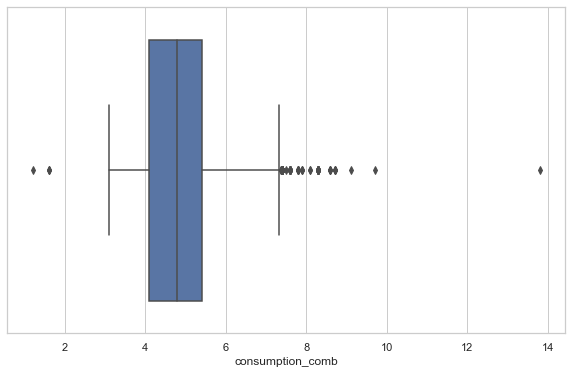

In [86]:
sns.boxplot(df.consumption_comb)

In [87]:
df.iloc[[13678]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,age
13678,Off-Road,7700.0,VAT deductible,95000.0,55.0,Used,1.0,1.0,Renault,Clio,White,Metallic,Cloth,5.0,5.0,Manual,1500.0,4.0,1162.0,front,Diesel,85.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Digital radio,Hands-free e...","Catalytic Converter,Sport package,Sport seats,...","ABS,Adaptive Cruise Control,Alarm system,Centr...",5.0,Italy,1.2,3.0


In [88]:
df.iloc[[535]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,age
535,Compact,12990.0,VAT deductible,41200.0,70.0,Used,1.0,0.0,Audi,A1,Silver,Metallic,Cloth,5.0,5.0,Manual,1000.0,8.0,1180.0,front,Benzine,164.0,Euro 4,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.0,Unknown,13.8,3.0


In [89]:
df[df.consumption_comb < 3][["make", "model"]].value_counts()

make     model
Audi     A3       3
Renault  Clio     1
dtype: int64

In [90]:
df.groupby(["make", "model", "body_type"])["consumption_comb"].median()

make     model     body_type    
Audi     A1        Compact          4.400
                   Coupe            3.802
                   Other            4.800
                   Sedans           4.200
                   Station wagon    4.200
                   Van              5.074
         A2        Off-Road         4.900
         A3        Compact          4.100
                   Convertible      4.800
                   Coupe            3.900
                   Other            4.150
                   Sedans           4.032
                   Station wagon    4.500
Opel     Astra     Compact          4.300
                   Coupe            6.200
                   Off-Road         5.600
                   Other            4.294
                   Sedans           4.800
                   Station wagon    4.500
         Corsa     Compact          5.600
                   Coupe            5.300
                   Off-Road         5.200
                   Other            5.200
 

In [91]:
df.consumption_comb.iloc[[13678]] 

13678    1.2
Name: consumption_comb, dtype: float64

In [92]:
df.consumption_comb.iloc[[13678]] = 3.35

In [93]:
df.consumption_comb.iloc[[13678]]

13678    3.35
Name: consumption_comb, dtype: float64

In [94]:
df.consumption_comb.iloc[[535]] = 4.400

<AxesSubplot:xlabel='consumption_comb'>

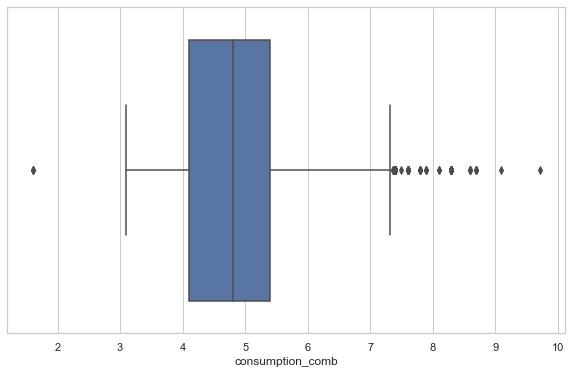

In [95]:
sns.boxplot(df.consumption_comb)

## 12. age

In [96]:
detect_outlier("age")

column name :  age
----------------------------------------
Q1 :  0.0
Q3 :  2.0
IQR :  2.0
lower limit :  -3.0
mean :  1.39
median :  1.0
upper limit :  5.0
count of lower values :  0
count of upper values :  0
 
the smallest 10 values :
 7959    0.0
7936    0.0
7935    0.0
7934    0.0
7933    0.0
7932    0.0
7931    0.0
7930    0.0
7929    0.0
7928    0.0
Name: age, dtype: float64
 
the biggest 10 values :
 0       3.0
5938    3.0
5955    3.0
5954    3.0
5953    3.0
5952    3.0
5950    3.0
5949    3.0
5947    3.0
5940    3.0
Name: age, dtype: float64





<AxesSubplot:xlabel='age'>

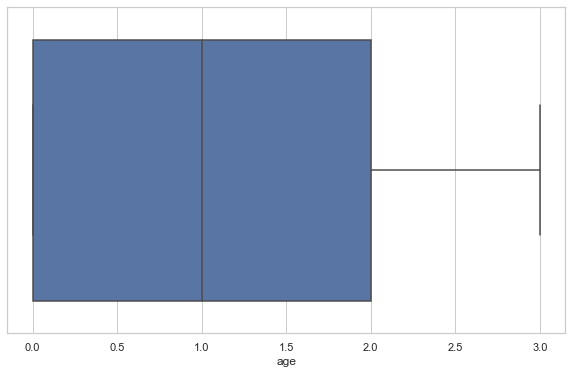

In [97]:
sns.boxplot(df.age)

## Control Categoric and Discrete Columns

In [98]:
col_o = ['body_type','vat','type', 'previous_owners',
       'warranty', 'make', 'model', 'body_color', 'paint_type', 'upholstery',
       'gearing_type',
       'drive_chain', 'fuel', 
       'emission_class', 'comfort&convenience', 'entertainment&media',
       'extras', 'safety&security', 'country_version']

In [99]:
def control_outlier(col) :
    print("column name : ",col)
    print("--"*20)
    print(get_diff_category_column(df[col]))
    print("**"*40)
    
    print("\n\n")

In [100]:
for col in col_o:
    control_outlier(col)

column name :  body_type
----------------------------------------
{0: 'Compact', 1: 'Convertible', 2: 'Coupe', 3: 'Off-Road', 4: 'Other', 5: 'Sedans', 6: 'Station wagon', 7: 'Transporter', 8: 'Van'}
********************************************************************************



column name :  vat
----------------------------------------
{0: 'Price negotiable', 1: 'VAT deductible'}
********************************************************************************



column name :  type
----------------------------------------
{0: 'Demonstration', 1: "Employee's car", 2: 'New', 3: 'Pre-registered', 4: 'Used'}
********************************************************************************



column name :  previous_owners
----------------------------------------
{0: '0.0', 1: '1.0', 2: '2.0', 3: '3.0', 4: '4.0'}
********************************************************************************



column name :  warranty
----------------------------------------
{0: '0.0', 1: '1.0'}
******

<AxesSubplot:>

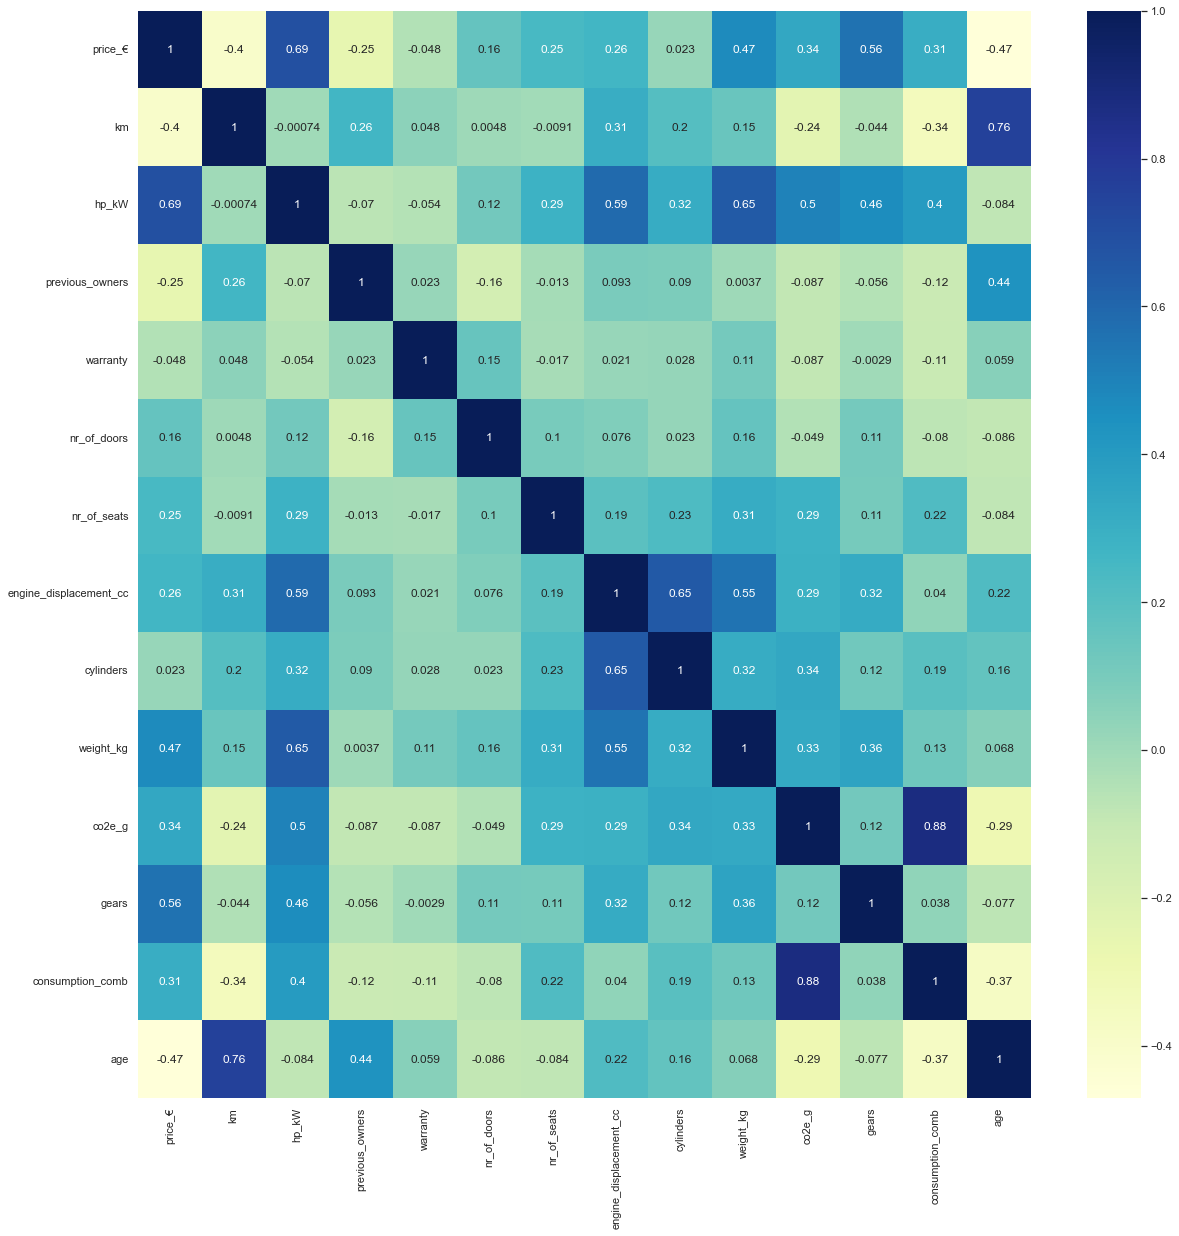

In [101]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [102]:
df.isnull().sum()

body_type                 0
price_€                   0
vat                       0
km                        0
hp_kW                     0
type                      0
previous_owners           0
warranty                  0
make                      0
model                     0
body_color                0
paint_type                0
upholstery                0
nr_of_doors               0
nr_of_seats               0
gearing_type              0
engine_displacement_cc    0
cylinders                 0
weight_kg                 0
drive_chain               0
fuel                      0
co2e_g                    0
emission_class            0
comfort&convenience       0
entertainment&media       0
extras                    0
safety&security           0
gears                     0
country_version           0
consumption_comb          0
age                       0
dtype: int64

In [103]:
df.columns

Index(['body_type', 'price_€', 'vat', 'km', 'hp_kW', 'type', 'previous_owners',
       'warranty', 'make', 'model', 'body_color', 'paint_type', 'upholstery',
       'nr_of_doors', 'nr_of_seats', 'gearing_type', 'engine_displacement_cc',
       'cylinders', 'weight_kg', 'drive_chain', 'fuel', 'co2e_g',
       'emission_class', 'comfort&convenience', 'entertainment&media',
       'extras', 'safety&security', 'gears', 'country_version',
       'consumption_comb', 'age'],
      dtype='object')

## Export dataframe to csv file (without dummy)

In [104]:
df.to_csv("auto_scout_handled_outliers.csv", index=False)